In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
from shapely.geometry import Point
from geopy import distance

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import re


import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
scaler = StandardScaler()

In [38]:
# Load data
clean_data = pd.read_csv('data/Ames_HousePrice_cleaned2.csv')
address_data = pd.read_csv('data/Ames_HousePrice_Address.csv')
city = gpd.read_file("data/city.geojson")
roads = gpd.read_file("data/roads.geojson")
park = gpd.read_file("data/park.geojson")

roads_df = roads[['highway','geometry']]
roads_motor = roads_df[roads_df['highway']=='motorway']
roads_primary = roads_df[roads_df['highway']=='primary']
roads_secondary = roads_df[roads_df['highway']=='secondary']
# roads_tertiary = roads_df[roads_df['highway']=='tertiary']
# roads_residential = roads_df[roads_df['highway']=='residential']


clean_data = clean_data.merge(address_data[['PID', 'Longitude', 'Latitude']], how = 'left', on = 'PID')
clean_data = clean_data[~clean_data['Longitude'].isna()].copy()
clean_data = clean_data[clean_data['PID']!=908154205]
# clean_data[~clean_data.MSZoning.isin(list(['A', 'C', 'FV', 'I']))]

In [143]:
# Geographic feature clustering
# clean_data_cluster = clean_data[['Longitude', 'Latitude']]
# scaled_features = scaler.fit_transform(clean_data_cluster)
# kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)
# kmeans.fit(scaled_features)
# clean_data['cluster'] = kmeans.labels_
# clean_data.to_csv('x_new.csv',index=False)
clean_data_geo = clean_data
# Geographic feature engineering
mainlocs = {"LincolnGrand" : (42.0228613,-93.6202381),
            "GreekCircle" : (42.0203082,-93.643163),
            "OntarioND" : (42.034549,-93.6787169),
            # "Stange13" : (42.0352885,-93.644862),
            # "LincolnSD" : (42.0229155,-93.6786829),
            # "Grand13" : (42.0345358,-93.6203941),
            "Grand24" : (42.0457363,-93.6205019),
            # "GWHarrison" : (42.0594753,-93.6592406),
            # "Jewel69" : (41.9935311,-93.6102327),
            # "IC3069" : (41.9935311,-93.6102327),
            "BloomStange" : (42.0563395,-93.6448835)
            }            

for kw, val in mainlocs.items():
    dist = clean_data_geo.apply(lambda x: distance.distance((x.loc['Latitude'],x.loc['Longitude']), val).miles, axis = 1)
    clean_data_geo['gaudist_%s' %kw] = np.exp(-(dist/1.5)**2)



In [144]:
clean_data_geo.head(20)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,price_sfgr,price_sf,perc_1stflr,house_footprint,house_ga_footprint,RoomSize,QualXSF,CondXSF,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,Bsmt_Y,OutdoorSpace,AgeSold,Longitude,Latitude,gaudist_LincolnGrand,gaudist_GreekCircle,gaudist_OntarioND,gaudist_Grand24,gaudist_BloomStange
0,0,909176150,856,126000,30,RL,65.0,7890,Pave,Reg,Lvl,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,618.0,856.0,GasA,TA,Y,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,3,2010,WD,Normal,147.196262,73.598131,1.000000,0.108492,0.159062,214.000000,5136,5136,0.0,0.0,0.0,238.0,0.0,1,0,60,-93.651441,42.017799,0.301076,0.910276,0.230017,0.062110,0.040952
1,1,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,104.0,1049.0,GasA,TA,Y,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,Fin,1.0,266.0,TA,TA,Y,2,2009,WD,Normal,132.983794,66.491897,1.000000,0.247698,0.310508,209.800000,5245,5245,552.0,393.0,0.0,0.0,0.0,1,105,25,-93.664194,42.024685,0.102161,0.570536,0.634956,0.041405,0.077302
2,2,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,100.0,837.0,GasA,Ex,Y,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,216.0,TA,Po,N,11,2007,WD,Normal,124.775225,67.954298,1.000000,0.165182,0.200825,200.200000,5005,9009,0.0,737.0,0.0,0.0,0.0,1,282,0,-93.613886,42.021555,0.950177,0.363394,0.004972,0.275421,0.024921
3,3,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,405.0,405.0,GasA,Gd,Y,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,Unf,1.0,281.0,TA,TA,N,5,2009,WD,Normal,109.720885,78.947368,0.690087,0.088019,0.122514,173.166667,4156,8312,0.0,0.0,0.0,0.0,0.0,1,168,6,-93.612241,42.037328,0.595508,0.175777,0.005430,0.794567,0.132859
4,4,534177230,1665,227000,60,RL,70.0,8400,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,167.0,810.0,GasA,Ex,Y,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,Fin,2.0,528.0,TA,TA,Y,11,2009,WD,Normal,136.336336,91.717172,0.486486,0.096429,0.159286,277.500000,13320,9990,643.0,0.0,0.0,0.0,0.0,1,45,8,-93.631899,42.044693,0.310658,0.244590,0.061021,0.856337,0.615422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,531382110,1680,163000,60,RL,50.0,8480,Pave,IR1,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,120.0,Gd,TA,PConc,Gd,TA,No,284.0,886.0,GasA,Ex,Y,886,794,0,0.0,1.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,RFn,2.0,474.0,TA,TA,Y,10,2008,WD,Normal,97.023810,63.522993,0.527381,0.104481,0.160377,240.000000,10080,8400,602.0,0.0,0.0,0.0,0.0,1,240,14,-93.689024,42.035878,0.002667,0.050365,0.879204,0.003249,0.041665
16,16,906380120,1274,203000,20,RL,68.0,8814,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1St

In [150]:
cl_y = clean_data_geo['SalePrice']
cl_x = clean_data_geo.drop(columns = ['Unnamed: 0', 'PID', 'SalePrice','MSSubClass', 'Street',\
    'LandContour','LotShape','LotArea','LotFrontage','LandSlope','PavedDrive','Condition1','Condition2',\
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','Functional','FireplaceQu',\
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','CentralAir','MoSold', 'YrSold',\
             'SaleType','Neighborhood','Longitude', 'Latitude', 'price_sfgr', 'price_sf'])\
    .drop(columns = ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtGLQSF',\
                                'BsmtALQSF', 'BsmtBLQSF', 'BsmtRecSF', 'BsmtLwQSF'])\
    .drop(columns = ['MSZoning', 'MasVnrArea', 'MasVnrType'])\
    .drop(columns = ['2ndFlrSF'])\
    .drop(columns = ['house_ga_footprint','GarageArea','GrLivArea',\
    'LotConfig', 'HouseStyle', 'LowQualFinSF', 'KitchenAbvGr'])\
    .drop(columns = ['CondXSF', 'QualXSF','OutdoorSpace','SaleCondition','BsmtExposure'])

In [151]:
# clean_data_geo.drop(columns = [], inplace = True)

In [152]:
cl_x.columns


Index(['BldgType', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'HeatingQC', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'perc_1stflr', 'house_footprint', 'RoomSize', 'Bsmt_Y', 'AgeSold',
       'gaudist_LincolnGrand', 'gaudist_GreekCircle', 'gaudist_OntarioND',
       'gaudist_Grand24', 'gaudist_BloomStange'],
      dtype='object')

In [153]:
cl_x['BldgType'].replace(to_replace=['TwnhsE'], value=['Twnhs'], inplace=True)
cl_x['HeatingQC'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
cl_x['KitchenQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
cl_x['BsmtQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
cl_x['BsmtCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
cl_x['ExterQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
# cl_x['ExterCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'NA', 'Fa', 'Po'], value=[2, 1, 0, 0, -1, -2], inplace=True) 
cl_x['BsmtBath'] = cl_x['BsmtFullBath']+0.5*cl_x['BsmtHalfBath']
cl_x['Bath'] = cl_x['FullBath']+0.5*cl_x['HalfBath']

cl_x = cl_x.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis = 1)

cl_x = cl_x.drop(['ExterCond'], axis = 1)

# cl_x.iloc[:,1:5]

0.89803874329784


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5.,  1.,
         4.,  5.,  5.,  7.,  8., 13.,  6., 13.,  4., 10.,  8.,  4.,  2.,
         2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.85  , 0.8525, 0.855 , 0.8575, 0.86  , 0.8625, 0.865 , 0.8675,
        0.87  , 0.8725, 0.875 , 0.8775, 0.88  , 0.8825, 0.885 , 0.8875,
        0.89  , 0.8925, 0.895 , 0.8975, 0.9   , 0.9025, 0.905 , 0.9075,
        0.91  , 0.9125, 0.915 , 0.9175, 0.92  , 0.9225, 0.925 , 0.9275,
        0.93  , 0.9325, 0.935 , 0.9375, 0.94  , 0.9425, 0.945 , 0.9475]),
 <BarContainer object of 39 artists>)

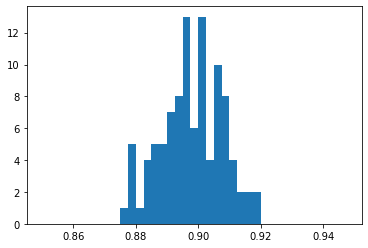

In [160]:
cl_x_dummies = pd.get_dummies(cl_x, drop_first=True)
               
cl_x_dummies = cl_x_dummies.fillna(0)

trainscore = []
testscore = []
coefs = []
residuals = []
residualratio = []

for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size=0.3, random_state=i, shuffle=True)

        model  = linear_model.RidgeCV(alphas=np.logspace(-5, 5, 3), normalize=True)
        model.fit(X_train, np.log(y_train))

        trainscore.append(model.score(X_train, np.log(y_train)))
        testscore.append(model.score(X_test, np.log(y_test)))
        coefs.append(model.coef_)
        residuals.append(cl_y - np.exp(model.predict(cl_x_dummies)))
        residualratio.append(cl_y/np.exp(model.predict(cl_x_dummies)))

avetrainscore = np.mean(trainscore)
avetestscore = np.mean(testscore)
averesiduals = np.mean(residuals, axis =0)
averesidualratio = np.mean(residualratio, axis =0)

coef = list(zip(X_train.columns.to_list(), model.coef_.T))
print(avetestscore)
# plt.hist(testscore, bins = np.arange(0.8,0.95,0.005))
# plt.savefig("testscore_without_outlier.svg")


plt.hist(testscore, bins = np.arange(0.85,0.95,0.0025))


In [161]:
model.alpha_

1e-05

In [83]:
# cl_x.to_csv('data/Ames_X.csv')
# cl_y.to_csv('data/Ames_Y.csv')

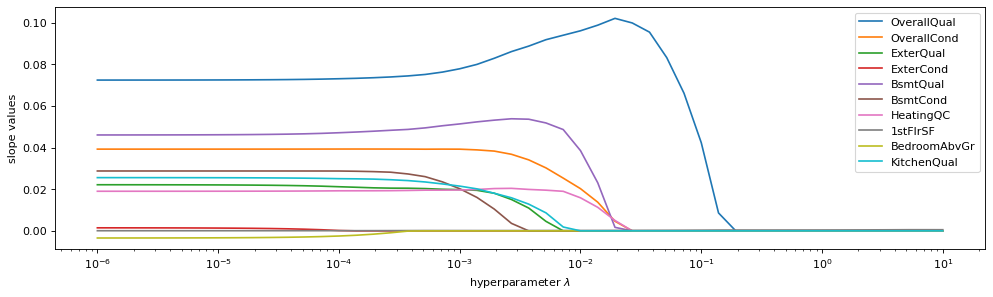

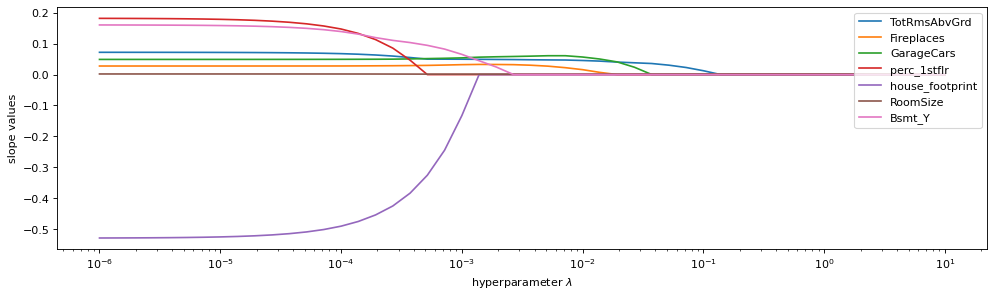

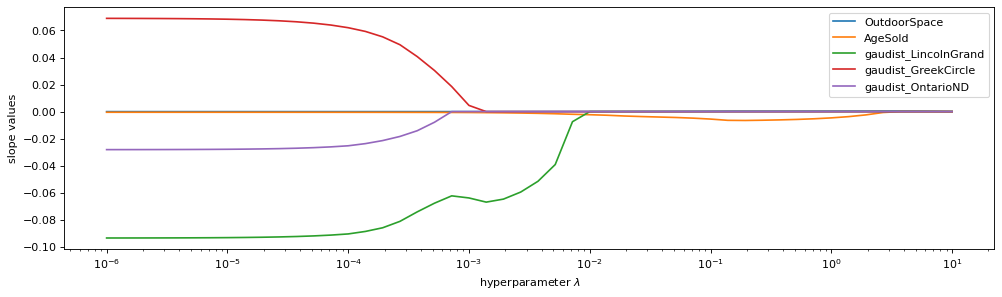

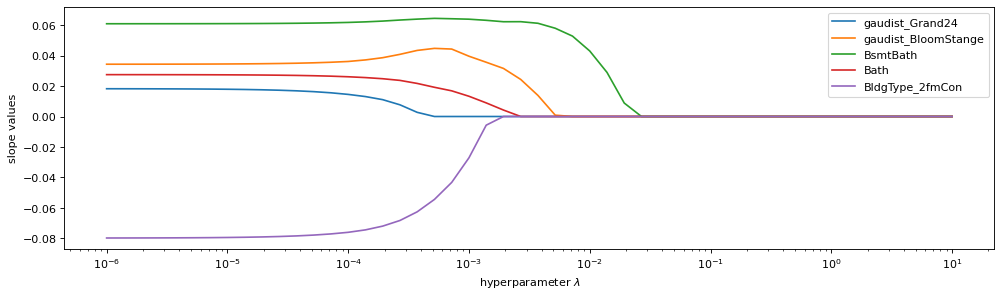

In [84]:
lasso  = linear_model.Lasso()
alphas = np.logspace(-6,1,50)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, np.log(y_train))  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso.head()

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[0:10]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[10:17]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[17:22]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[22:27]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 



In [85]:
housing = clean_data.copy()
housing['residual'] = averesiduals.T
housing['residualratio'] = averesidualratio.T
housing.sort_values('residual')


,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,price_sfgr,price_sf,perc_1stflr,house_footprint,house_ga_footprint,RoomSize,QualXSF,CondXSF,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,Bsmt_Y,OutdoorSpace,AgeSold,Longitude,Latitude,gaudist_LincolnGrand,gaudist_GreekCircle,gaudist_OntarioND,gaudist_Grand24,gaudist_BloomStange,residual,residualratio
275,275,533350090,2944,150000,60,RL,99.0,24572,Pave,IR1,Lvl,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,584.0,994.0,GasA,TA,Y,1599,1345,0,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,RFn,3.0,864.0,TA,TA,Y,6,2008,WD,Family,50.951087,38.090401,0.543139,0.065074,0.100236,327.111111,26496,8832,410.0,0.0,0.0,0.0,0.0,1,226,31,-93.655582,42.036729,0.153016,0.471247,0.527396,0.198008,0.387201,-124166.014180,0.548561
1984,1984,532478020,2014,275000,20,RL,122.0,15676,Pave,IR1,Low,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,115.0,Gd,Gd,CBlock,Gd,Gd,Gd,189.0,2014.0,GasA,Gd,Y,2014,0,0,1.0,0.0,2,0,2,1,Gd,6,Maj1,2,Gd,Attchd,RFn,3.0,864.0,TA,TA,Y,4,2009,WD,Normal,136.544191,68.272095,1.000000,0.128477,0.183593,335.666667,16112,16112,0.0,1733.0,0.0,92.0,0.0,1,717,29,-93.660327,42.037236,0.097420,0.385443,0.661534,0.132820,0.348836,-100106.182251,0.733265
1735,1735,535125010,2207,180000,20,RL,155.0,19900,Pave,Reg,Lvl,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,Gable,CompShg,Plywood,Plywood,BrkFace,287.0,TA,TA,CBlock,Gd,TA,Gd,1035.0,1947.0,GasA,TA,Y,2207,0,0,1.0,0.0,2,0,3,1,TA,7,Min1,1,Gd,Attchd,RFn,2.0,576.0,TA,TA,Y,7,2010,WD,Normal,81.558677,43.331728,1.000000,0.110905,0.139849,315.285714,15449,11035,912.0,0.0,0.0,0.0,0.0,1,301,21,-93.614307,42.049514,0.213244,0.061693,0.004727,0.927418,0.301778,-95094.780741,0.654438
512,512,528108020,2042,253293,20,RL,98.0,12704,Pave,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,2042.0,2042.0,GasA,Ex,Y,2042,0,0,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,RFn,3.0,1390.0,TA,TA,Y,8,2009,New,Partial,124.041626,62.020813,1.000000,0.160737,0.270151,255.250000,16336,10210,0.0,0.0,0.0,0.0,0.0,1,90,0,-93.654144,42.062992,0.008549,0.018333,0.088661,0.140679,0.823229,-85578.967156,0.747538
487,487,532476050,2646,260000,80,RL,100.0,14330,Pave,IR1,Low,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,Gd,Fa,CBlock,Gd,TA,Gd,228.0,1748.0,GasA,Gd,Y,2151,495,0,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,RFn,2.0,550.0,TA,TA,Y,1,2006,WD,Normal,98.261527,59.171598,0.812925,0.150105,0.188486,294.000000,18522,10584,0.0,1023.0,497.0,0.0,0.0,1,741,32,-93.660643,42.037065,0.095530,0.385177,0.671827,0.128130,0.340056,-81034.807419,0.762556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,911370410,1652,392500,120,RM,64.0,5587,Pave,IR1,HLS,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,Hip,CompShg,CemntBd,CmentBd,Stone,186.0,Ex,TA,PConc,Ex,TA,Gd,120.0,1600.0,GasA,Ex,Y,1652,0,0,1.0,1.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,Fin,2.0,482.0,TA,TA,Y,11,2008,New,Partial,237.590799,120.694957,1.000000,0.295686,0.3

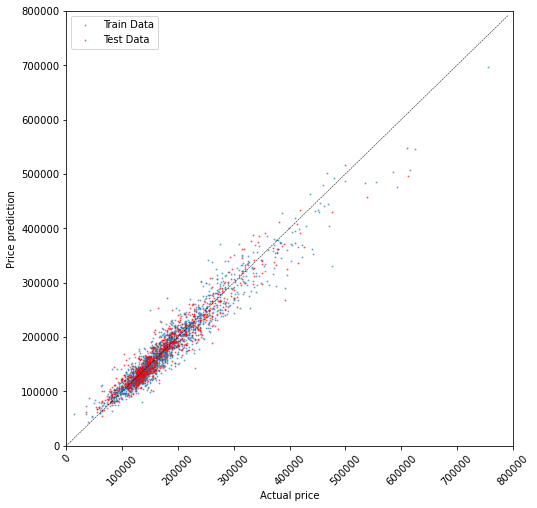

In [86]:
def abline(slope, intercept, ax):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, 'k--', linewidth=0.5)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_train, np.exp(model.predict(X_train)), alpha = 0.5, s = 1, label='Train Data')
ax.scatter(y_test, np.exp(model.predict(X_test)), alpha = 0.5, s = 1, color = 'red', label='Test Data')
abline(1,0,ax)
plt.xlim([0, 800000])
plt.ylim([0, 800000])
plt.xlabel('Actual price')
plt.ylabel('Price prediction')
plt.xticks(rotation = 45)
leg = ax.legend()

plt.show()

fig.savefig("predictresult.svg")

<GeoAxesSubplot:>

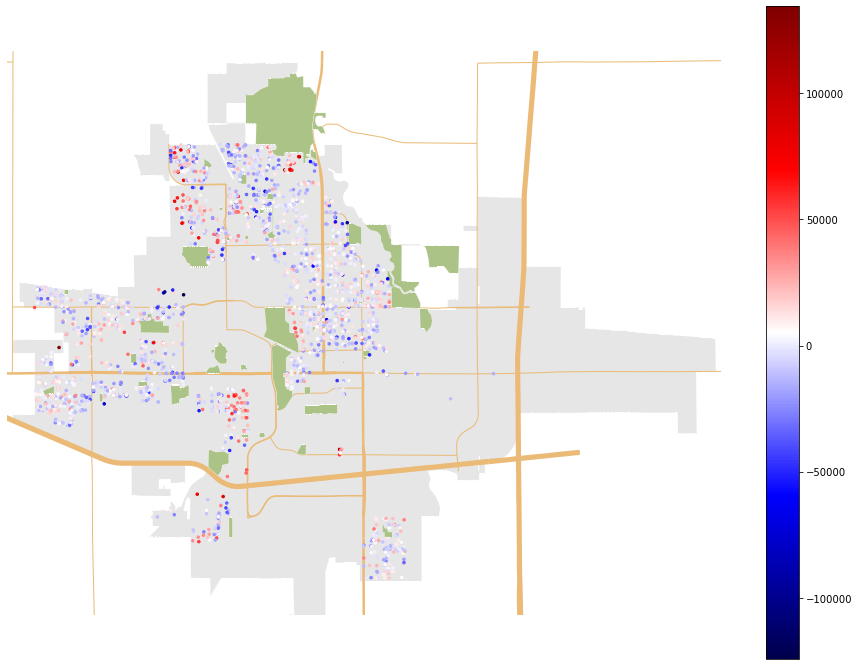

In [87]:
houses = housing.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])),
    axis='columns'
)
housing['pps'] = housing['SalePrice']/housing['GrLivArea']
houses_geocode = gpd.GeoDataFrame(housing, geometry=houses)

ax = geoplot.polyplot(city, projection=gcrs.AlbersEqualArea(), edgecolor='white', facecolor='#e6e6e6', linewidth=.3, figsize=(16, 12))
geoplot.polyplot(roads_motor, edgecolor='#ebba76', linewidth=4, ax = ax)
geoplot.polyplot(roads_primary, edgecolor='#ebba76', linewidth=2.5, ax = ax)
geoplot.polyplot(roads_secondary, edgecolor='#ebba76', linewidth=1, ax = ax)
# geoplot.polyplot(roads_tertiary, edgecolor='white', linewidth=1, ax = ax)
# geoplot.polyplot(roads_residential, edgecolor='white', linewidth=0.25, ax = ax)
geoplot.pointplot(houses_geocode, hue='residual',cmap = 'seismic', marker = '.', s = 5, alpha = 1, legend=True, ax=ax)
# geoplot.pointplot(houses_geocode, hue='gaudist_Grand24',cmap = 'cool', marker = '.', s = 5, legend=True, ax=ax)
# geoplot.pointplot(houses_geocode, hue='MSSubClass',cmap = 'jet', marker = '.', s = 5, legend=True, ax=ax)

geoplot.polyplot(park, projection=gcrs.AlbersEqualArea(), edgecolor='white', facecolor='#acc388', linewidth=.3, ax=ax, extent=( -93.70,41.98, -93.52, 42.08))
# plt.savefig("map.svg")

In [88]:
xmin, xmax, nx = -93.70, -93.52, 128
ymin, ymax, ny = 41.98, 42.08, 100

x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)
X2 = X.reshape(-1)
Y2 = Y.reshape(-1)
coords = pd.DataFrame(zip(X2,Y2))


for kw, val in mainlocs.items():
    dist = coords.apply(lambda x: distance.distance((x[1],x[0]), val).miles, axis = 1)
    coords['gaudist_%s' %kw] = np.exp(-(dist/1.5)**2)



C:\Users\chadd\AppData\Local\Temp\ipykernel_19540\1793655886.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


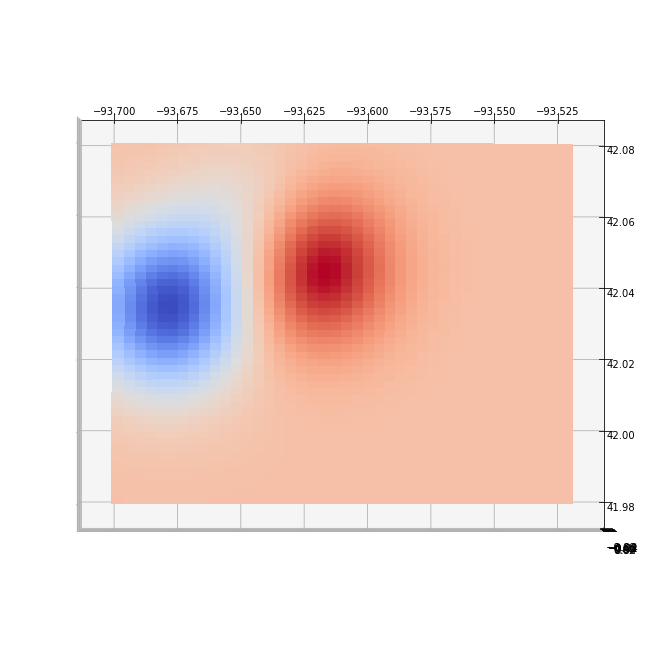

In [89]:
from matplotlib import cm 

coef = np.array(coef)
Z = coords.to_numpy()[:,2:7].astype(float)@coef[17:22,1].astype(float)
Z = Z.reshape(100,128)

fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.5, alpha = 1, antialiased=False)
ax.view_init(azim=-110, elev=25)
ax.view_init(azim=-90, elev=90)
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.view_init(20, 35)
ax.set_box_aspect((1.28, 1, 0.15))
plt.savefig("heat.svg")


In [90]:
import plotly.express as px
df = px.data.carshare()
df

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19
...,...,...,...,...
244,45.547171,-73.556258,951.416667,3
245,45.546482,-73.574939,795.416667,2
246,45.495523,-73.627725,425.750000,8
247,45.521199,-73.581789,1044.833333,17


In [91]:
# import plotly.offline as go_offline
# import plotly.graph_objects as go
# import plotly.express as px

# # CREATING 3D TERRAIN MODEL
# fig=go.Figure()
# fig.add_trace(go.Scattermapbox(lat = clean_data_geo["Latitude"], lon = clean_data_geo["Longitude"],\
#     mode='markers',\
#     marker=go.scattermapbox.Marker(size=9)))
# fig.add_trace(go.Surface(z=Z,x=X,y=Y, opacity = 0.5))
        
# fig.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=dict(
#         accesstoken='pk.eyJ1IjoiY2hhZGxvaCIsImEiOiJja2dkejM3ejIwN3M1MnJ0OTFjaXp0dWkwIn0.2NM6sivklBFKtjRraSoJDg',
#         bearing=0,
#         center=dict(
#             lat=(ymin+ymax)/2,
#             lon=(xmin+xmax)/2
#         ),pitch=90,zoom=13))
# fig.update_layout(scene=dict(aspectratio=dict(x=2, y=2, z=0.2),xaxis = dict(range=[xmin,xmax],),yaxis = dict(range=[ymin,ymax])))
# go_offline.plot(fig,filename='3d_terrain.html',validate=True, auto_open=False)

# fig.show()


In [92]:
import chart_studio.plotly as py
import topojson
import json

with open("data/city.geojson") as json_file:
    jdata = json_file.read()
    geoJSON = json.loads(jdata)

# topo_features = topoJSON['objects']['geometries']
# scale = topoJSON['transform']['scale']
# translation = topoJSON['transform']['translate']

# geoJSON=dict(type= 'FeatureCollection', 
#              features = [])

# for k, tfeature in enumerate(topo_features):
#     geo_feature = dict(id=k, type= "Feature")
#     geo_feature['properties'] = tfeature['properties']
#     geo_feature['geometry'] = topojson.geometry(tfeature, topoJSON['arcs'], scale, translation)    
#     geoJSON['features'].append(geo_feature)  

py.sign_in('empet', '')

pts=[]#list of points defining boundaries of polygons
for  feature in geoJSON['features']:
    if feature['geometry']['type']=='Polygon':
        pts.extend(feature['geometry']['coordinates'][0])    
        pts.append([None, None])#mark the end of a polygon   
        
    elif feature['geometry']['type']=='MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            pts.extend(polyg[0])
            pts.append([None, None])#end of polygon
    else: raise ValueError("geometry type irrelevant for map")    

X, Y=zip(*pts)
data=[dict(type='scatter',
          x=X,
          y=Y,
          mode='lines',
          line=dict(width=0.5, color='blue'),
          )]
          
axis_style=dict(showline=False, 
                mirror=False, 
                showgrid=False, 
                zeroline=False,
                ticks='',
                showticklabels=False)
layout=dict(title='France regions',
            width=700, height=700, 
            autosize=False,
            xaxis=axis_style,
            yaxis=axis_style,
            hovermode='closest')
fig=dict(data=data, layout=layout)

# py.iplot(fig, filename='France-map2d')

